In [1]:
import numpy as np
import os
import pathlib
import sys

if pathlib.Path(os.getcwd()).parents[2] not in sys.path:
    sys.path.append(str(pathlib.Path(os.getcwd()).parents[2]))

In [2]:
from Sensors.BatEcho.Spatializer import Render
from Sensors.BatEcho import Setting as sensorconfig

### Create beacon function
Need to keep track of beacon center as well as the sub-component of the beacon

In [3]:
def beacon2objects(x, y, theta, d, mode='unicorn', bull_angle=np.pi/3):
    objects = np.asarray([x, y, 2], dtype=np.float32).reshape(1,3)
    # make horn:
    if mode=='unicorn':
        horn = np.asarray([x + d*np.cos(theta), y +d*np.sin(theta), 1], dtype=np.float32).reshape(1,3)
    elif mode=='bull':
        horn = np.asarray([[x + d*np.cos(theta+bull_angle/2), y + d*np.sin(theta+bull_angle/2), 1],
                            [x + d*np.cos(theta-bull_angle/2), y + d*np.sin(theta-bull_angle/2), 1]], 
                            dtype=np.float32).reshape(2,3)
    return np.vstack((objects, horn))

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
bat_pose = np.asarray([0,0,np.pi/2])
objects = beacon2objects(0,0.65,-np.pi/2,d=0.2)
fig, ax = plt.subplots()
ax.scatter(objects[objects[:,2]==2][:,0], objects[objects[:,2]==2][:,1], c='g', s=200)
ax.scatter(objects[objects[:,2]==1][:,0], objects[objects[:,2]==1][:,1], c='k', s=20)
#ax.quiver([bat_pose[0], bat_pose[1]], U=np.cos(bat_pose[2]), V=np.sin(bat_pose[2]),
#          scale_unit='xy', scale=1)
ax.set_xlim([-3,3])
ax.set_ylim([-2,4])
ax.set_aspect('equal')

In [ ]:
render = Render()
compressed = render.run(bat_pose, objects)
envelope_L = render.cache['left_envelope']
envelope_R = render.cache['right_envelope']
pole_comp = render.run(bat_pose, objects[np.where(objects[:,2]==1)]) #np.zeros((1,3)))
pole_envL = render.cache['left_envelope']
pole_envR = render.cache['right_envelope']
plant_comp = render.run(bat_pose, objects[np.where(objects[:,2]==2)])
plant_envL = render.cache['left_envelope']
plant_envR = render.cache['right_envelope']
fig, ax = plt.subplots(3,2, figsize=(16,8), sharey=True)
for label, data in zip(compressed.keys(), compressed.values()):
    ax[0,0].step(sensorconfig.COMPRESSED_DISTANCE_ENCODING, data, alpha=0.8, label=label)
ax[0,1].plot(sensorconfig.DISTANCE_ENCODING, envelope_L, alpha=0.8, label='L')
ax[0,1].plot(sensorconfig.DISTANCE_ENCODING, envelope_R, alpha=0.8, label='R')
ax[0,1].legend()

for label, data in zip(pole_comp.keys(), pole_comp.values()):
    ax[1,0].step(sensorconfig.COMPRESSED_DISTANCE_ENCODING, data, alpha=0.8, label=label)
ax[1,1].plot(sensorconfig.DISTANCE_ENCODING, pole_envL, alpha=0.8, label='L')
ax[1,1].plot(sensorconfig.DISTANCE_ENCODING, pole_envR, alpha=0.8, label='R')
ax[1,1].legend()

for label, data in zip(plant_comp.keys(), plant_comp.values()):
    ax[2,0].step(sensorconfig.COMPRESSED_DISTANCE_ENCODING, data, alpha=0.8, label=label)
ax[2,1].plot(sensorconfig.DISTANCE_ENCODING, plant_envL, alpha=0.8, label='L')
ax[2,1].plot(sensorconfig.DISTANCE_ENCODING, plant_envR, alpha=0.8, label='R')
ax[2,1].legend()
fig.tight_layout(pad=0.2)

In [ ]:
bat_pose = np.asarray([0,0,np.pi/2-0*np.pi/18])
objects = beacon2objects(0,0.74,-np.pi/2,d=0.3, mode='bull', bull_angle=np.pi/2)
fig1, ax1 = plt.subplots()
ax1.scatter(objects[objects[:,2]==2][:,0], objects[objects[:,2]==2][:,1], c='g', s=200)
ax1.scatter(objects[objects[:,2]==1][:,0], objects[objects[:,2]==1][:,1], c='k', s=20)
#ax.quiver([bat_pose[0], bat_pose[1]], U=np.cos(bat_pose[2]), V=np.sin(bat_pose[2]),
#          scale_unit='xy', scale=1)
ax1.set_xlim([-3,3])
ax1.set_ylim([-2,4])
ax1.set_aspect('equal')

render = Render()
compressed = render.run(bat_pose, objects)
envelope_L = render.cache['left_envelope']
envelope_R = render.cache['right_envelope']
pole_comp = render.run(bat_pose, objects[np.where(objects[:,2]==1)]) #np.zeros((1,3)))
#pole_comp = render.run(bat_pose, np.zeros((1,3)))
pole_envL = render.cache['left_envelope']
pole_envR = render.cache['right_envelope']
plant_comp = render.run(bat_pose, objects[np.where(objects[:,2]==2)])
plant_envL = render.cache['left_envelope']
plant_envR = render.cache['right_envelope']
fig, ax = plt.subplots(3,2, figsize=(16,8), sharey=True)
for label, data in zip(compressed.keys(), compressed.values()):
    ax[0,0].step(sensorconfig.COMPRESSED_DISTANCE_ENCODING, data, alpha=0.8, label=label)
ax[0,1].plot(sensorconfig.DISTANCE_ENCODING, envelope_L, alpha=0.8, label='L')
ax[0,1].plot(sensorconfig.DISTANCE_ENCODING, envelope_R, alpha=0.8, label='R')
ax[0,1].legend()

for label, data in zip(pole_comp.keys(), pole_comp.values()):
    ax[1,0].step(sensorconfig.COMPRESSED_DISTANCE_ENCODING, data, alpha=0.8, label=label)
ax[1,1].plot(sensorconfig.DISTANCE_ENCODING, pole_envL, alpha=0.8, label='L')
ax[1,1].plot(sensorconfig.DISTANCE_ENCODING, pole_envR, alpha=0.8, label='R')
ax[1,1].legend()

for label, data in zip(plant_comp.keys(), plant_comp.values()):
    ax[2,0].step(sensorconfig.COMPRESSED_DISTANCE_ENCODING, data, alpha=0.8, label=label)
ax[2,1].plot(sensorconfig.DISTANCE_ENCODING, plant_envL, alpha=0.8, label='L')
ax[2,1].plot(sensorconfig.DISTANCE_ENCODING, plant_envR, alpha=0.8, label='R')
ax[2,1].legend()
fig.tight_layout(pad=0.2)

In [ ]:
angles = np.arange(-60,60.2, 0.2)
distances = [1.2, 1., 0.8, 0.75, 0.7, 0.65]
compressed_echoes = np.asarray([]).reshape(0,int(56*2))
envelopes = np.asarray([]).reshape(0,14000)

for distance in distances:
    for angle in angles:
        bat_pose = np.asarray([0, 0, np.pi/2 - np.radians(angle)],dtype=np.float32)
        objects = beacon2objects(0, distance, -np.pi, d=0.3, mode='bull', bull_angle=np.pi/3)
        render = Render()
        compressed = render.run(bat_pose, objects)
        envelope_L = render.cache['left_envelope']
        envelope_R = render.cache['right_envelope']
        compressed_echoes = np.vstack((compressed_echoes, np.concatenate((list(compressed.values()))).reshape(1,-1) ))
        envelopes = np.vstack((envelopes, np.concatenate((envelope_L, envelope_R)).reshape(1,-1) ))

In [5]:
from matplotlib import colors

In [8]:
angles = np.arange(-90,90.2, 0.2)
distances = np.arange(1.2, 0.6, -0.1)
compressed_echoes = np.asarray([]).reshape(0,int(50*2))
envelopes = np.asarray([]).reshape(0,14000)
green_indices = []
red_indices = []
for distance in distances:
    for i, angle in enumerate(angles):
        if angle==-90: red_indices.append(i)
        if angle==0: green_indices.append(i)
        bat_pose = np.asarray([distance*np.cos(np.radians(angle)), distance*np.sin(np.radians(angle)), np.radians(angle)-np.pi],dtype=np.float32)
        objects = beacon2objects(0, 0, 0, d=0.3, mode='bull', bull_angle=np.pi/3)
        render = Render()
        compressed = render.run(bat_pose, objects)
        envelope_L = render.cache['left_envelope']
        envelope_R = render.cache['right_envelope']
        compressed_echoes = np.vstack((compressed_echoes, np.concatenate((list(compressed.values()))).reshape(1,-1) ))
        envelopes = np.vstack((envelopes, np.concatenate((envelope_L, envelope_R)).reshape(1,-1) ))

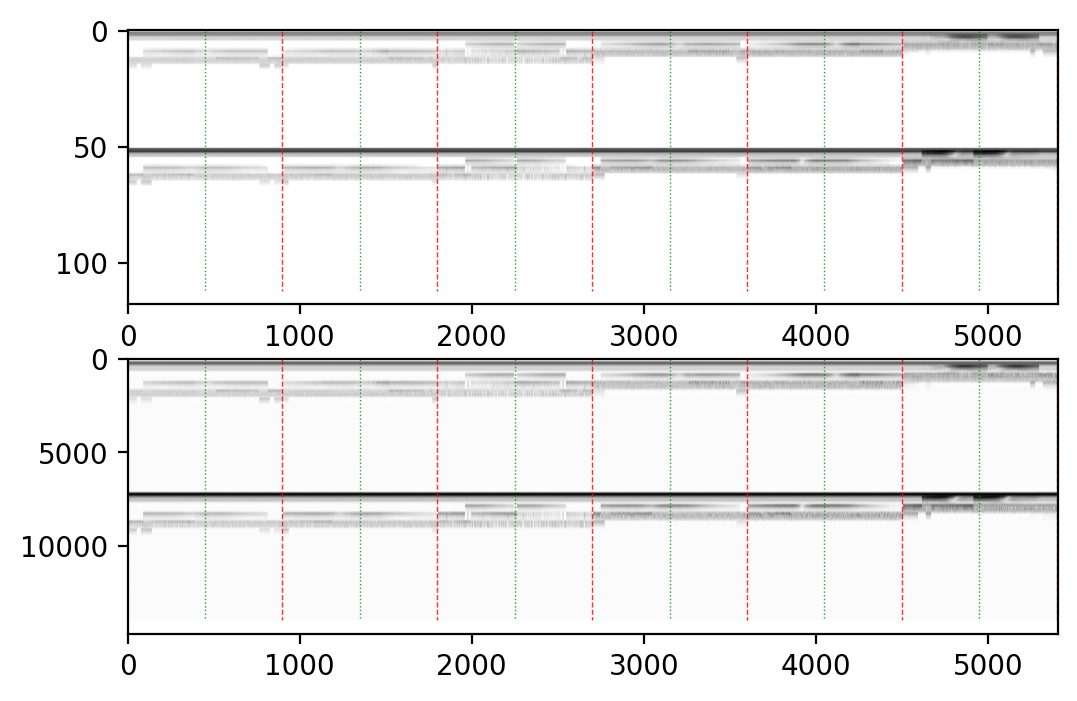

In [14]:

fig, ax = plt.subplots(2,1, dpi=200)
ax[0].imshow(compressed_echoes.T, cmap='Greys', aspect='auto')
ax[0].vlines(x=900*np.arange(1,7), ymin=0, ymax=112, linewidth=0.5, colors='r', linestyle='--',alpha=0.8)
ax[0].vlines(x=900*np.arange(0.5,6.5), ymin=0, ymax=112, linewidth=0.5, colors='g', linestyle=':',alpha=0.8)
ax[1].imshow(envelopes.T, cmap='Greys', aspect='auto')
ax[1].vlines(x=900*np.arange(1,7), ymin=0, ymax=14000, linewidth=0.5, colors='r', linestyle='--',alpha=0.8)
ax[1].vlines(x=900*np.arange(0.5,6.5), ymin=0, ymax=14000, linewidth=0.5, colors='g', linestyle=':',alpha=0.8)

In [13]:
green_indices

[]